<a href="https://colab.research.google.com/github/Cattosan/torretooneechandrive/blob/main/Torretos%20to%20Onee-chanDrive(localtunnel%20ver).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='blue'> - Torrents to OneDrive - <br> Shared by [Cheems](https://github.com/cheems); <br> modified by [jericjan](https://github.com/jericjan); <br> modified again by [Catto-san](https://github.com/Cattosan); </font>**


# <font color='pink'>1. Install R**CLONE**</font> &nbsp; <img src='https://biplobsd.github.io/RLabClone/img/title_rclonelab.svg' height="60" alt="RcloneLab"/> <br> <img src='https://i.imgur.com/cmNHuw9.jpg' height="300"/>

In [ ]:
!wget https://downloads.rclone.org/v1.52.1/rclone-v1.52.1-linux-amd64.deb
!apt install ./rclone-v1.52.1-linux-amd64.deb

# <font color='orange'>2. Authenticate OneDrive</font> &nbsp; 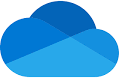 <br> <img src='https://i.imgur.com/d6Mh1rA.jpg' height="245"/>

In [ ]:
!rclone config      #add your onedrive

# <font color='green'>3. Mount OneDrive using R**CLONE**</font> &nbsp; <img src='https://i.imgur.com/GpAoutq.png' height="60" alt="RcloneLab"/> <br> <img src='https://i.imgur.com/PuNERlv.png' height="300"/>

In [ ]:
!mkdir onedrive
!nohup rclone --vfs-cache-mode writes mount onedrive: ./onedrive &    

#<font color='green'>*3.a. Check if OneDrive is Mounted?* </font>

In [ ]:
!ls ./onedrive    #after sucessfully mounted onedrive then show your onedrive folders and files

# <font color='red'>4. Install Localtunnel & qBittorrent</font> &nbsp; <img src="https://raw.githubusercontent.com/sudo-ken/Torrents-to-Google-Drive/master/title_qbittorrent.png" height="60" alt="qBittorrent"> <br> <img src='https://i.imgur.com/0Gqh48q.png' height="300"/>

#<font color='red'>*4.a. Install Localtunnel* </font>



*   Install localtunnel first to replace ngrok and then install qbittorrent, then it'll give you a URL for the WEB-UI.



In [ ]:
!npm install -g localtunnel

# <font color='red'> *4.b. Install qBittorrent*</font>

In [ ]:
import os, time, urllib.request, json; from IPython.display import clear_output


if os.path.isfile("/usr/bin/qbittorrent-nox") == False:
    get_ipython().system_raw("apt update -qq -y && yes "" | add-apt-repository ppa:qbittorrent-team/qbittorrent-stable")
    get_ipython().system_raw("apt install qbittorrent-nox")
    get_ipython().system_raw("mkdir -p -m 666 /{content/qBittorrent,root/{.qBittorrent_temp,.config/qBittorrent}} && curl -s https://pastebin.com/raw/7TEALGNz -o /root/.config/qBittorrent/qBittorrent.conf")
    print("qBittorrent successfully installed.")
    clear_output(wait=True)
else:
    print("qBittorrent already installed. Skipping...")
    clear_output(wait=True)
    !pkill qbittorrent-nox
    
!qbittorrent-nox -d --webui-port=5454
print("qBittorrent started ")
clear_output(wait=True)

if os.path.isfile("/usr/bin/rclone") == False:
    get_ipython().system_raw('curl https://rclone.org/install.sh | sudo bash &')
    print("Rclone successfully installed")
    clear_output(wait=True)
else:
    print("Rclone already installed. Skipping...")
    clear_output(wait=True)

!lt --port 5454

# <font color='blue'>5. Copy to OneDrive </font> &nbsp; 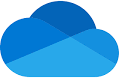 <br> <img src='https://i.imgur.com/W1jBYkm.png' height="300"/>

In [ ]:
# ============================= FORM ============================= #
Mode = "Move" #@param ["Off","Config", "Copy", "Move", "Sync", "Checker", "Deduplicate", "Remove Empty Directories", "Empty Trash", "qBittorrent"]
Compare = "Size & Mod-Time" #@param ["Size & Mod-Time", "Size & Checksum", "Only Mod-Time", "Only Size", "Only Checksum"]
Source = "/content/udrive/qBittorrent" #@param {type:"string"}
Destination = "" #@param {type:"string"}
Transfers = 4 #@param {type:"slider", min:1, max:20, step:1}
Checkers = 20 #@param {type:"slider", min:1, max:40, step:1}
#@markdown ---

#@markdown <center><h3><font color="#3399ff"><b>⚙️ Global Configuration ⚙️</b></font></h3></center>

#@markdown ---
Simple_Ouput = True #@param {type:"boolean"}
Skip_files_that_are_newer_on_the_destination = True #@param {type:"boolean"}
Skip_all_files_that_exist = True #@param {type:"boolean"}
Do_not_cross_filesystem_boundaries = False
Do_not_update_modtime_if_files_are_identical = False #@param {type:"boolean"}
Large_amount_of_files_optimization = False
Google_Drive_optimization = True #@param {type:"boolean"}
Dry_Run = False #@param {type:"boolean"}
Output_Log_File = "OFF" #@param ["OFF", "NOTICE", "INFO", "ERROR", "DEBUG"]
Extra_Arguments = "" #@param {type:"string"}
#@markdown ---

#@markdown <center><h3><font color="#3399ff"><b>↪️ Sync Configuration ↩️</b></font></h3></center>

#@markdown ---
Sync_Mode = "Delete during transfer" #@param ["Delete during transfer", "Delete before transfering", "Delete after transfering"]
Track_Renames = False #@param {type:"boolean"}
#@markdown ---

#@markdown <center><h3><font color="#3399ff"><b>💞 Deduplicate Configuration 💞</b></font></h3></center>

#@markdown ---
Deduplicate_Mode = "Interactive" #@param ["Interactive", "Skip", "First", "Newest", "Oldest", "Largest", "Rename"]
Deduplicate_Use_Trash = True #@param {type:"boolean"}
# ================================================================ #

import os; from IPython.display import HTML, clear_output
import sys


if Mode != "Off":

  # Optimized for Google Colaboratory
  os.environ["bufferC"] = "--buffer-size 96M"

  if Compare == "Size & Checksum":
    os.environ["compareC"] = "-c"
  elif Compare == "Only Mod-Time":
    os.environ["compareC"] = "--ignore-size"
  elif Compare == "Only Size":
    os.environ["compareC"] = "--size-only"
  elif Compare == "Only Checksum":
    os.environ["compareC"] = "-c --ignore-size"
  else:
    os.environ["compareC"] = ""

  os.environ["sourceC"] = Source
  os.environ["destinationC"] = Destination
  os.environ["transfersC"] = "--transfers "+str(Transfers)
  os.environ["checkersC"] = "--checkers "+str(Checkers)

  if Skip_files_that_are_newer_on_the_destination == True:
    os.environ["skipnewC"] = "-u"
  else:
    os.environ["skipnewC"] = ""

  if Skip_all_files_that_exist == True:
    os.environ["skipexistC"] = "--ignore-existing"
  else:
    os.environ["skipexistC"] = ""

  if Do_not_cross_filesystem_boundaries == True:
    os.environ["nocrossfilesystemC"] = "--one-file-system"
  else:
    os.environ["nocrossfilesystemC"] = ""

  if Do_not_update_modtime_if_files_are_identical == True:
    os.environ["noupdatemodtimeC"] = "--no-update-modtime"
  else:
    os.environ["noupdatemodtimeC"] = ""

  if Large_amount_of_files_optimization == True:
    os.environ["filesoptimizeC"] = "--fast-list"
  else:
    os.environ["filesoptimizeC"] = ""

  if Google_Drive_optimization == True:
    os.environ["driveoptimizeC"] = "--drive-chunk-size 32M --drive-acknowledge-abuse --drive-keep-revision-forever --disable copy"
  else:
    os.environ["driveoptimizeC"] = ""

  if Dry_Run == True:
    os.environ["dryrunC"] = "-n"
  else:
    os.environ["dryrunC"] = ""

  if Output_Log_File != "OFF":
    os.environ["statsC"] = "--log-file=/root/.rclone_log/rclone_log.txt"
  else:
    if Simple_Ouput == True:
      os.environ["statsC"] = "-v --stats-one-line --stats=5s"
    else:
      os.environ["statsC"] = "-v --stats=5s"

  if Output_Log_File == "INFO":
    os.environ["loglevelC"] = "--log-level INFO"
  elif Output_Log_File == "ERROR":
    os.environ["loglevelC"] = "--log-level ERROR"
  elif Output_Log_File == "DEBUG":
    os.environ["loglevelC"] = "--log-level DEBUG"
  else:
    os.environ["loglevelC"] = ""

  os.environ["extraC"] = Extra_Arguments

  if Sync_Mode == "Delete during transfer":
    os.environ["syncmodeC"] = "--delete-during"
  elif Sync_Mode == "Delete before transfering":
    os.environ["syncmodeC"] = "--delete-before"
  elif Sync_Mode == "Delete after transfering":
    os.environ["syncmodeC"] = "--delete-after"

  if Track_Renames == True:
    os.environ["trackrenamesC"] = "--track-renames"
  else:
    os.environ["trackrenamesC"] = ""

  if Deduplicate_Mode == "Interactive":
    os.environ["deduplicateC"] = "interactive"
  elif Deduplicate_Mode == "Skip":
    os.environ["deduplicateC"] = "skip"
  elif Deduplicate_Mode == "First":
    os.environ["deduplicateC"] = "first"
  elif Deduplicate_Mode == "Newest":
    os.environ["deduplicateC"] = "newest"
  elif Deduplicate_Mode == "Oldest":
    os.environ["deduplicateC"] = "oldest"
  elif Deduplicate_Mode == "Largest":
    os.environ["deduplicateC"] = "largest"
  elif Deduplicate_Mode == "Rename":
    os.environ["deduplicateC"] = "rename"

  if Deduplicate_Use_Trash == True:
    os.environ["deduplicatetrashC"] = ""
  else:
    os.environ["deduplicatetrashC"] = "--drive-use-trash=false"

  ### rclone Execution

  if Output_Log_File != "OFF" and Mode != "Config":
    !mkdir -p -m 666 /root/.rclone_log/
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Logging enables, rclone will not output log through the terminal, please wait until finished.</h2><br></center>"))


  if Mode == "Config":
    !rclone --config=/root/.rclone.conf config
  elif Mode == "Copy":
    !rclone --config=/root/.rclone.conf copy "$sourceC" "$destinationC" $transfersC $checkersC $statsC $loglevelC $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $dryrunC $extraC
  elif Mode == "Move":
    !rclone --config=/root/.rclone.conf move "$sourceC" "$destinationC" $transfersC $checkersC $statsC $loglevelC --delete-empty-src-dirs $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $dryrunC $extraC
  elif Mode == "Sync":
    !rclone --config=/root/.rclone.conf sync "$sourceC" "$destinationC" $transfersC $checkersC $statsC $loglevelC $syncmodeC $trackrenamesC $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $dryrunC $extraC
  elif Mode == "Checker":
    !rclone --config=/root/.rclone.conf check "$sourceC" "$destinationC" $checkersC $statsC $loglevelC $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $dryrunC $extraC
  elif Mode == "Deduplicate":
    !rclone --config=/root/.rclone.conf dedupe "$sourceC" $checkersC $statsC $loglevelC --dedupe-mode $deduplicateC $deduplicatetrashC $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $dryrunC $extraC
  elif Mode == "Remove Empty Directories":
    !rclone --config=/root/.rclone.conf rmdirs "$sourceC" $statsC $loglevelC $dryrunC $extraC
  elif Mode == "Empty Trash":
    !rclone --config=/root/.rclone.conf cleanup "$sourceC" $statsC $loglevelC $dryrunC $extraC
  elif Mode == "qBittorrent":
    !chmod -R 666 /content/qBittorrent/
    !rclone --config=/root/.rclone.conf move "/content/qBittorrent/" "$destinationC" $transfersC $checkersC $statsC $loglevelC --delete-empty-src-dirs --exclude **/.unwanted/ $compareC $skipnewC $skipexistC $nocrossfilesystemC $noupdatemodtimeC $bufferC $filesoptimizeC $driveoptimizeC $dryrunC $extraC

  ### Log Output

  if Output_Log_File != "OFF" and Mode != "Config":
    ### Rename log file and output settings.
    !mv /root/.rclone_log/rclone_log.txt /root/.rclone_log/rclone_log_$(date +%Y-%m-%d_%H.%M.%S).txt
    with open("/root/.rclone_log/" + Mode + "_settings.txt", "w") as f:
      f.write("Mode: " + Mode + \
              "\nCompare: " + Compare + \
              "\nSource: \"" + Source + \
              "\"\nDestination: \"" + Destination + \
              "\"\nTransfers: " + str(Transfers) + \
              "\nCheckers: " + str(Checkers) + \
              "\nSkip files that are newer on the destination: " + str(Skip_files_that_are_newer_on_the_destination) + \
              "\nSkip all files that exist: " + str(Skip_all_files_that_exist) + \
              "\nDo not cross filesystem boundaries: " + str(Do_not_cross_filesystem_boundaries) + \
              "\nDo not update modtime if files are identical: " + str(Do_not_update_modtime_if_files_are_identical) + \
              "\nDry-Run: " + str(Dry_Run) + \
              "\nOutput Log Level: " + Output_Log_File + \
              "\nExtra Arguments: \"" + Extra_Arguments + \
              "\"\nSync Moden: " + Sync_Mode + \
              "\nTrack Renames: " + str(Track_Renames) + \
              "\nDeduplicate Mode: " + Deduplicate_Mode + \
              "\nDeduplicate Use Trash: " + str(Deduplicate_Use_Trash))
    ### Compressing log file.
    !rm -f /root/rclone_log.zip
    !zip -r -q -j -9 /root/rclone_log.zip /root/.rclone_log/
    !rm -rf /root/.rclone_log/
    !mkdir -p -m 666 /root/.rclone_log/
    ### Send Log
    if os.path.isfile("/root/rclone_log.zip") == True:
      try:
        files.download("/root/rclone_log.zip")
        !rm -f /root/rclone_log.zip
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#446785;\">Sending log to your browser...</h2><br></center>"))
      except:
        !mv /root/rclone_log.zip /content/rclone_log_$(date +%Y-%m-%d_%H.%M.%S).zip
        display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#446785;\">You can use file explorer to download the log file.</h2><br></center>"))
    else:
      clear_output(wait=True)
      display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">There is no log file.</h2><br></center>"))

  ### Operation has been successfully completed.
  if os.path.isfile("/usr/bin/rclone") == False:
    clear_output(wait=True)
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">❌ Please run the installation cell above first.</h2><br></center>"))
  elif Mode != "Config":
    display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#00b24c;\">✅ Operation has been successfully completed.</h2><br></center>"))
else:
  !echo "doing nothing because the mode is set to off"

### 📚 Follow me on GitHub for more: [_@cheems_](https://github.com/cheems)
##### 📦 Repo: [Github](https://github.com/cheems/Torrents-to-Google-Drive)